### Now I play with baby names

In [1]:
import pandas as pd

In [2]:
names1880 = pd.read_csv('yob1880.txt',names =['name','sex','births'])

In [3]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [4]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [5]:
years = range(1880,2020)
pieces = []
columns = ['name','sex','births']

In [6]:
for year in years:
    path = 'yob%d.txt' % year
    frame = pd.read_csv(path,names=columns)

    frame['year'] = year
    pieces.append(frame)

In [7]:
names=pd.concat(pieces,ignore_index=True)

In [8]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1987924,Zyheem,M,5,2019
1987925,Zykel,M,5,2019
1987926,Zyking,M,5,2019
1987927,Zyn,M,5,2019


In [9]:
total_births = names.pivot_table('births',index='year',columns='sex',aggfunc = sum)

In [10]:
total_births.tail()

sex,F,M
year,,
2015,1781725,1913059
2016,1767902,1893471
2017,1721550,1845472
2018,1694640,1809166
2019,1665373,1779948


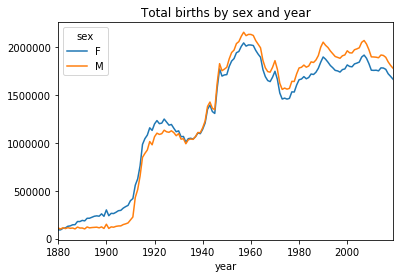

In [12]:
total_births.plot(title = 'Total births by sex and year')

In [13]:
def add_prop(group):
    #integer division floors
    births = group.births.astype(float)

    group['prop'] = births/births.sum()
    return group

In [14]:
names = names.groupby(['year','sex']).apply(add_prop)

In [15]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1987924,Zyheem,M,5,2019,0.000003
1987925,Zykel,M,5,2019,0.000003
1987926,Zyking,M,5,2019,0.000003
1987927,Zyn,M,5,2019,0.000003


In [16]:
import numpy as np
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [17]:
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]

In [18]:
grouped = names.groupby(['year','sex'])

In [19]:
top1000 = grouped.apply(get_top1000)

In [20]:
top1000=top1000.reset_index(drop=True)

In [21]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
279872,Stone,M,209,2019,0.000117
279873,Seven,M,209,2019,0.000117
279874,Dhruv,M,209,2019,0.000117
279875,Aayan,M,209,2019,0.000117


In [22]:
boys = top1000[top1000.sex =='M']

In [23]:
girls = top1000[top1000.sex =='F']

In [24]:
boys

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
...,...,...,...,...,...
279872,Stone,M,209,2019,0.000117
279873,Seven,M,209,2019,0.000117
279874,Dhruv,M,209,2019,0.000117
279875,Aayan,M,209,2019,0.000117


In [25]:
total_births = top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)

In [26]:
total_births

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Aayan,Ab,Abagail,...,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,Zyaire,Zyon
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,...,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,297.0,NaN,4866.0,NaN,541.0,7164.0,211.0,NaN,NaN,NaN,...,6954.0,371.0,NaN,NaN,NaN,NaN,NaN,714.0,NaN,NaN
2016,NaN,284.0,4644.0,NaN,519.0,7164.0,NaN,NaN,NaN,NaN,...,6453.0,313.0,NaN,NaN,NaN,NaN,NaN,890.0,248.0,NaN
2017,241.0,291.0,4181.0,NaN,526.0,7205.0,NaN,NaN,NaN,NaN,...,6054.0,323.0,NaN,NaN,NaN,NaN,NaN,850.0,301.0,NaN


In [27]:
subset = total_births[['John','Harry','Mary','Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026493EB7F88>,
      dtype=object)

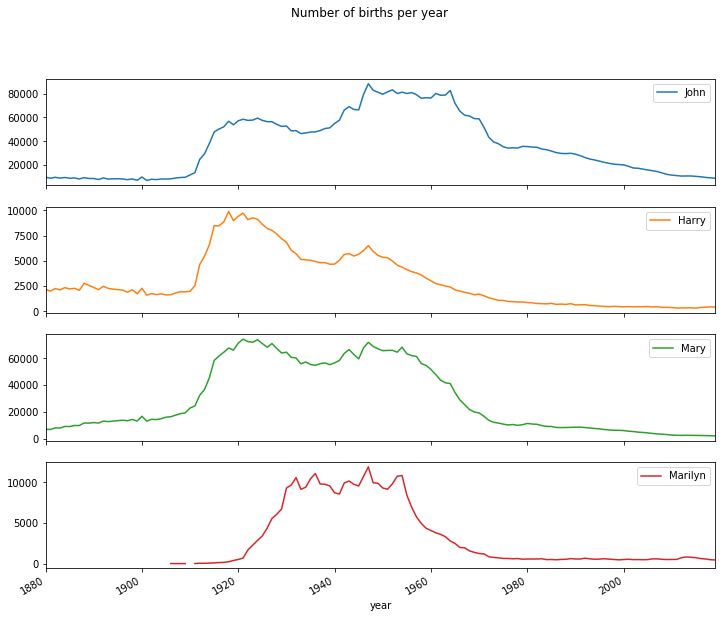

In [28]:
subset.plot(subplots=True,figsize=(12,10),grid=False,title='Number of births per year')

In [29]:
table = top1000.pivot_table('prop',index='year',columns = 'sex',aggfunc=sum)

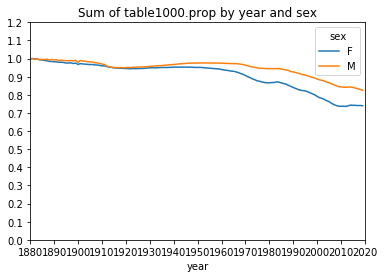

In [30]:
table.plot(title='Sum of table1000.prop by year and sex',yticks = np.linspace(0,1.2,13),xticks =range(1880,2030,10))

In [31]:
df=boys[boys.year ==2010]

In [32]:
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [33]:
prop_cumsum = df.sort_values(by='prop',ascending=False).prop.cumsum()

In [34]:
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [35]:
prop_cumsum.searchsorted(0.5)

116

In [36]:
df=boys[boys.year == 1900]

In [37]:
in1900 = df.sort_values(by='prop',ascending=False).prop.cumsum()

In [38]:
in1900.searchsorted(0.5)+1

25

In [ ]:
def get_quantile_count(group,q=0.5):
    group = group.sort_values(by='prop',ascending=False)
    return prop_cumsum.values.searchsorted(0.5)